<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Data_Driven_Models(PlasticSales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving PlasticSales.csv to PlasticSales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


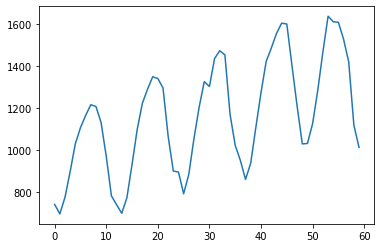

In [3]:
ps = pd.read_csv("PlasticSales.csv")
ps.Sales.plot()

In [4]:
ps

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


# Splitting data

In [8]:
Train = ps.head(48)
Test = ps.tail(12)

In [9]:
Train

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [10]:
Test

,Month,Sales
48,Jan-53,1030
49,Feb-53,1032
50,Mar-53,1126
51,Apr-53,1285
52,May-53,1468
53,Jun-53,1637
54,Jul-53,1611
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420


# Moving Average 

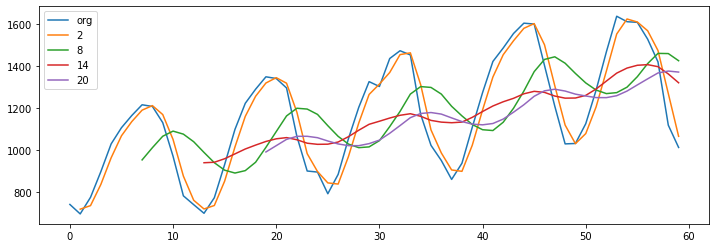

In [11]:
plt.figure(figsize=(12,4))
ps.Sales.plot(label="org")
for i in range(2,24,6):
    ps["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


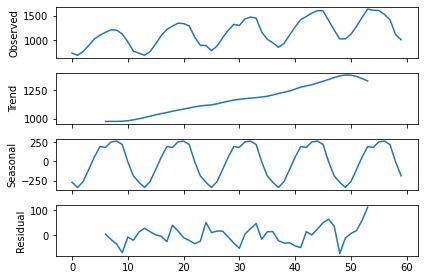

In [12]:
decompose_ts_add = seasonal_decompose(ps.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


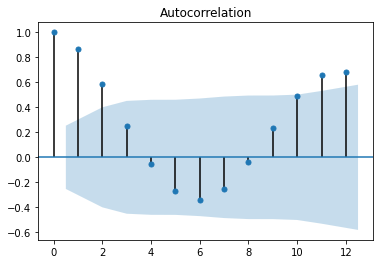

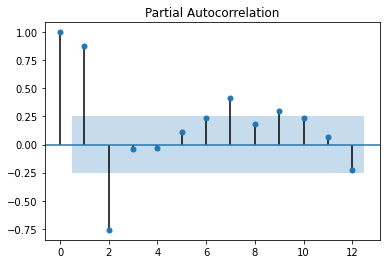

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ps.Sales,lags=12)
tsa_plots.plot_pacf(ps.Sales,lags=12)
plt.show()


### Evaluation Metric MAPE

In [14]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [20]:
ses_model = SimpleExpSmoothing(Train.Sales).fit(smoothing_level=0.9)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


17.04814421789499

### Holt method 

In [30]:
# Holt method 
hw_model = Holt(Train.Sales).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

18.48529089659675

### Holts winter exponential smoothing with additive seasonality and additive trend


In [31]:
hwe_model_add_add = ExponentialSmoothing(Train.Sales,seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


14.422043039403137

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_model_mul_add = ExponentialSmoothing(Train.Sales,seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

15.002141910017977

## Final Model by combining train and test

In [33]:
hwe_model_add_add = ExponentialSmoothing(ps.Sales,seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [34]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

60     937.817209
61     898.870094
62     977.027309
63    1125.135612
64    1271.163709
65    1380.949433
66    1377.844826
67    1430.306314
68    1426.427913
69    1377.568187
dtype: float64